In [4]:
import tensorflow as tf 
import matplotlib.pyplot as plt




In [5]:
Mnist=tf.keras.datasets.mnist 
(x_train,t_train),(x_test,t_test)=Mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


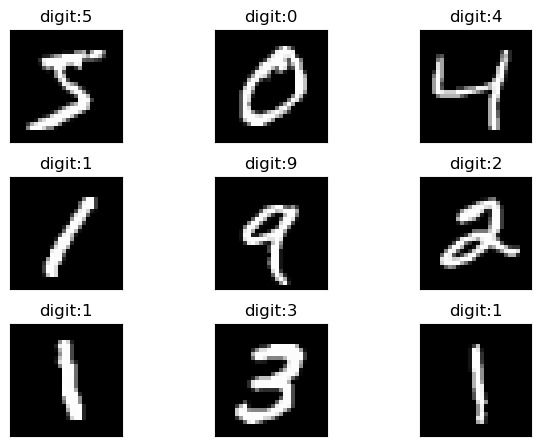

In [8]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i].reshape(28,28), cmap="gray", interpolation="none")
    plt.title("digit:{}".format(t_train[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [9]:
x_train.astype('float32')
x_test.astype('float32')
x_train,x_test=x_train/255,x_test/255
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(t_train.shape)

(60000, 28, 28, 1)
(60000,)


In [10]:
num_category=10
t_train=tf.keras.utils.to_categorical(t_train,num_category)
t_test=tf.keras.utils.to_categorical(t_test,num_category)
print(t_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [16]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,3,activation="relu",padding="same",input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128,3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_category,activation="softmax")
])

In [17]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


In [19]:
batch_size=128
num_epoch=50
History=model.fit(x_train,t_train,
                  batch_size=batch_size,epochs=num_epoch, validation_data=(x_test,t_test))

Epoch 1/50
469/469 [==============================] - 42s 89ms/step - loss: 0.1872 - accuracy: 0.9455 - val_loss: 0.0496 - val_accuracy: 0.9828
Epoch 2/50
469/469 [==============================] - 42s 90ms/step - loss: 0.1135 - accuracy: 0.9670 - val_loss: 0.0380 - val_accuracy: 0.9861
Epoch 3/50
469/469 [==============================] - 44s 93ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0337 - val_accuracy: 0.9895
Epoch 4/50
469/469 [==============================] - 44s 94ms/step - loss: 0.0767 - accuracy: 0.9769 - val_loss: 0.0296 - val_accuracy: 0.9888
Epoch 5/50
469/469 [==============================] - 45s 95ms/step - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.0245 - val_accuracy: 0.9912
Epoch 6/50
469/469 [==============================] - 45s 96ms/step - loss: 0.0598 - accuracy: 0.9823 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 7/50
469/469 [==============================] - 46s 98ms/step - loss: 0.0538 - accuracy: 0.9843 - val_loss: 0.0251 - val_accuracy:

In [20]:
score=model.evaluate(x_test,t_test,verbose=0)
print("Test loss=",score[0])
print("Test accuracy=",score[1])


Test loss= 0.031539350748062134
Test accuracy= 0.9940000176429749


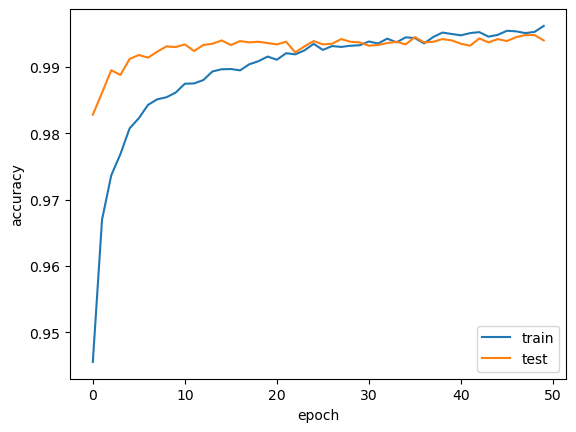

In [23]:
plt.plot(History.history['accuracy'],label="train")
plt.plot(History.history['val_accuracy'],label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

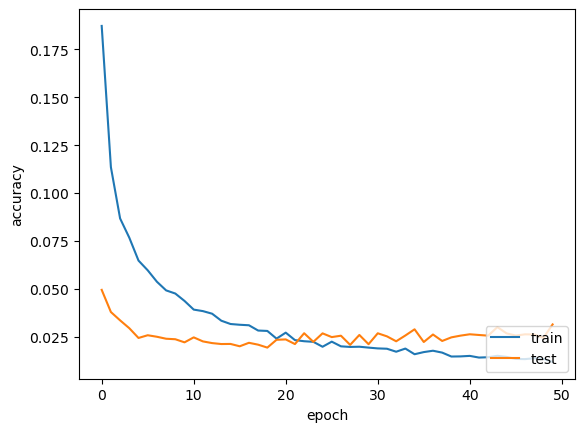

In [26]:
plt.plot(History.history['loss'],label="train")
plt.plot(History.history['val_loss'],label="test")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()